## Riddler Express

After 2^10, what’s the next (whole number) power of 2 that comes closer to a power of 10? (To be clear, “closer” doesn’t refer to the absolute difference — it means your power of 2 should differ from a power of 10 by less than 2.4 percent.)

In [7]:
    """
    After 2^10, what’s the next (whole number) power of 2 that comes closer to a power of 10? 
    """
    import numpy as np

    n = 4
    pct_diff = 1000
    while pct_diff >= .024:
        x = 10.**n
        y = round(np.log2(x),0)
        pct_diff = abs((2**y-x)/x)
        n+=1
    print("power of ten: ", n)
    print("power of two: ", y)
    print("pct_diff: ", round(pct_diff,3))    

power of ten:  29
power of two:  93.0
pct_diff:  0.01


In [11]:
from math import log

p = 10000
while abs(2 ** round(log(p, 2)) - p) / p > 0.024:
    p *= 10
print(round(log(p, 2)))

93


In [12]:
# first attempt - incorrect
"""
After 2^10, what's the next (whole number) power of 2 that comes closer to a power of 10? 
"""
n = 11
pct_diff = 2.5
while pct_diff > .024:
    x = 2**n
    y = 10**(len(str(x))-1)
    pct_diff = (x-y)/y
    n+=1
print("power: ", n)
print("pct_diff: ", round(pct_diff,3)) 

power:  104
pct_diff:  0.014


## Riddler Classic

Suppose all of Riddler City, with its incredibly vast population (25 percent of whom will wait for Tiffany), decides to get a haircut at this barbershop one fine morning, and everyone lines up at its entrance in a random order a few minutes before the shop opens at 8 a.m. After opening, the four barbers will start cutting hair for their first customers at random times between 8 a.m. and 8:15 a.m. Each haircut then lasts exactly 15 minutes.

Sadly, you find yourself toward the back of this very, very long line. To pass the time while you wait, you spend a long time thinking about this week’s Riddler column, completely unaware of the passage of time. The next thing you know, you’re second in line, with one person waiting in front of you — the exact conditions from the original puzzle. At this point, how long should you expect to wait for your haircut from Tiffany?

(Hint: Think about the probability that the person in front of you will request Tiffany. Is it still 25 percent? Also, keep in mind that if there are multiple Tiffany requesters at the front of the line, and a barber other than Tiffany becomes available, the next non-Tiffany requester will effectively jump the line.)



In [1]:
import datetime as dt
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Barber:
    def __init__(self, haircut_start_time,name):
        self.haircut_start_time = haircut_start_time
        self.haircut_finish_time = haircut_start_time + dt.timedelta(minutes=15)
        self.name = name

class Customer: 
    def __init__(self,tiffany_pref,name):
        self.tiffany_pref = tiffany_pref
        self.name = name
        
def getStartTime(barber):
    return barber.haircut_start_time

In [3]:
def createCustomerList(n=1000):
    customer_list = np.ones(n).tolist()
    for i in range(0,len(customer_list)):
        customer_list[i] = Customer(tiffany_pref = random.choice([False,False,False,True]),name = None)
    return customer_list
    # customer_list.append(Customer(tiffany_pref = True,name = 'You'))

def createBarberList():
    barber_list = [
        Barber(haircut_start_time = dt.datetime(2000,1,1,8,random.randrange(0,15,1),random.randrange(0,60,1)), name = None)
        , Barber(haircut_start_time = dt.datetime(2000,1,1,8,random.randrange(0,15,1),random.randrange(0,60,1)), name = None)
        , Barber(haircut_start_time = dt.datetime(2000,1,1,8,random.randrange(0,15,1),random.randrange(0,60,1)), name = None)
        , Barber(haircut_start_time = dt.datetime(2000,1,1,8,random.randrange(0,15,1),random.randrange(0,60,1)), name = 'Tiffany')
    ]

    barber_list.sort(key=getStartTime)
    return barber_list

In [23]:
def run(barber_list,customer_list):    
    waiting_for_tiffany_list = []
    while (len(customer_list) + len(waiting_for_tiffany_list)) > 1:
        if barber_list[0].name == 'Tiffany':
            if len(waiting_for_tiffany_list) > 0:
                waiting_for_tiffany_list.pop(0)
            else:
                customer_list.pop(0)
        else:
            if len(customer_list) > 0:
                for i in range(0,len(customer_list)):
                    if customer_list[0].tiffany_pref == True:
                        waiting_for_tiffany_list.append(customer_list.pop(0))
                    else:
                        customer_list.pop(0)
                        break
            else: 
                pass
        barber_list[0].haircut_start_time + dt.timedelta(minutes=15)
        barber_list.append(barber_list.pop(0))
    if len(customer_list) > 0:
        return customer_list[0].tiffany_pref
    else:
        return True

In [21]:
def runSimulation(sims=100,customers = 10000):
    sims = sims
    trues = 0 
    falses = 0 
    for n in range(sims):
        if run(createBarberList(),createCustomerList(n=customers)):
            trues += 1
        else: 
            falses +=1
#     print('trues: ', trues)
#     print('falses: ', falses)
#     print('probability that customer ahead of you is waiting for tiffany: ', round(float(trues)/sims,2))
    return round(float(trues)/sims,2)

In [33]:
runSimulation(sims = 100, customers = 10000) #limiting to 100 iterations for speed

0.99

~100% of the time, the person in front of you will be waiting for Tiffany, as well, if there were infinite people in front of you.

So, what is the expected wait time?

Assuming no knowledge of where Tiffany is in her haircut, on average, she is halfway done (7.5 minutes to go), then we'll add on the 100% * 15 minutes for the estimated additional time you will need to wait --> ***22.5 minutes***


In [ ]:
# How does this look for various numbers of customers:
customer_range = range(100,10100,100)
prob_list = []
for i in customer_range:
    print(i,)
    prob = runSimulation(100,customers = i)
    prob_list.append(prob)
plt.scatter(customer_range,prob_list);

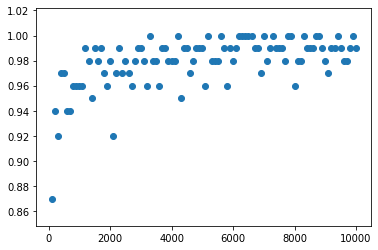

In [53]:
plt.scatter(customer_range,prob_list);